<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [25]:
X = np.array([-3,-2,-1,0,1,2,3])
Y = np.array([4,5,2,6,8,-10,2])

In [26]:
x_inter = np.linspace(-3,1,100)
y_inter = np.interp(x_inter,X,Y)

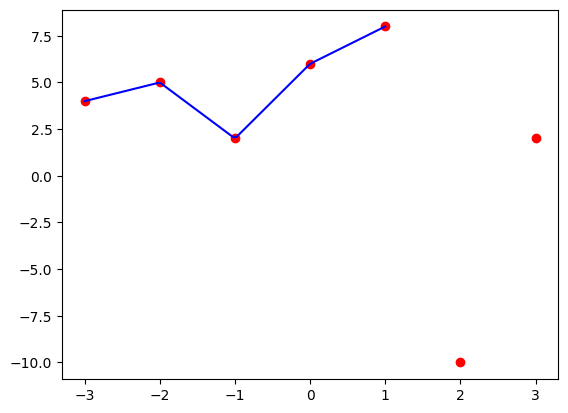

In [27]:
plt.scatter(X,Y,color='r')
plt.plot(x_inter,y_inter,color='b')
plt.show()

In [28]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])

  return L

In [29]:
x = sym.Symbol('x',real=True)
x

x

In [30]:
Lagrange(x,X,0)

-x*(1/4 - x/4)*(2/5 - x/5)*(1/2 - x/6)*(-x - 2)*(-x/2 - 1/2)/3

In [31]:
Lagrange(x,X,1)

-x*(1/3 - x/3)*(1/2 - x/4)*(3/5 - x/5)*(-x - 1)*(x + 3)/2

In [32]:
Lagrange(x,X,0).subs(x,X[1])

0

In [33]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [34]:
Interpolate(-2.5,X,Y)

5.416015625

In [35]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

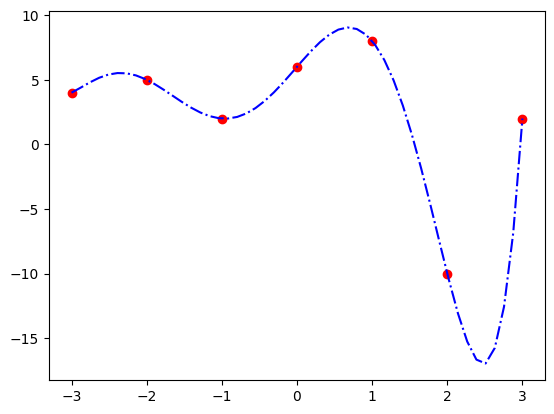

In [36]:
plt.scatter(X,Y,color='r')
#plt.plot(x_inter,y_inter,color='b')
plt.plot(x1,y1,'-.',color='b')
plt.show()

In [38]:
 poly = Interpolate(x,X,Y)
 poly = poly.expand()
 poly

11*x**6/120 + 11*x**5/30 - 5*x**4/6 - 49*x**3/12 - 31*x**2/120 + 403*x/60 + 6

In [41]:
sym.diff(poly,x,1)

11*x**5/20 + 11*x**4/6 - 10*x**3/3 - 49*x**2/4 - 31*x/60 + 403/60

In [42]:
sym.diff(poly,x,5)

22*(3*x + 2)

In [43]:
X = np.array([0,1,2,3])
Y = np.exp(X)

In [47]:
x1 = np.linspace(X[0],X[-1],40)
y1 = Interpolate(x1,X,Y)

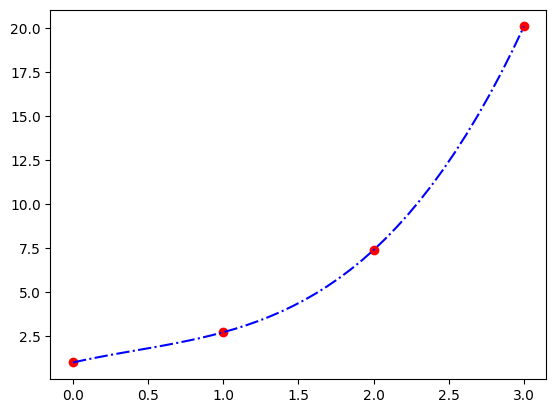

In [49]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1,'-.',color='b')
plt.show()

In [52]:
estima = Interpolate(2.5,X,Y)

In [53]:
real = np.exp(2.5)

In [54]:
np.abs(real-estima)

0.23451334914670774

In [57]:
cita = 2.5
E = np.exp(cita)/np.math.factorial(len(X)) * (cita -X[0])*(cita - X[1])*(cita - X[2])*(cita - X[3])
E

<ipython-input-57-fc80516e13ae>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  E = np.exp(cita)/np.math.factorial(len(X)) * (cita -X[0])*(cita - X[1])*(cita - X[2])*(cita - X[3])


-0.47587867033997944